# Credit Card Fraud Detection using R Language

## Data Preprocessing

In [ ]:
install.packages("ranger")
install.packages("caret")
install.packages("data.table")
install.packages("caTools")
install.packages("pROC")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("neuralnet")

In [ ]:
# Import modules
library(ranger)
library(caret)
library(data.table)
library(caTools)
library(pROC)
library(rpart)

In [7]:
# Load the data from file
file_data <- read.csv('creditcard.csv')
head(file_data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [8]:
# Print names
names(file_data)


[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

In [9]:
# Frequency of Class
table(file_data$Class)


     0      1 
233319    423 

In [10]:
# Summary of Data
summary(file_data$Class)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.00000 0.00000 0.00000 0.00181 0.00000 1.00000       1 

In [12]:
# Number of rows
nrow(file_data)

[1] 233743

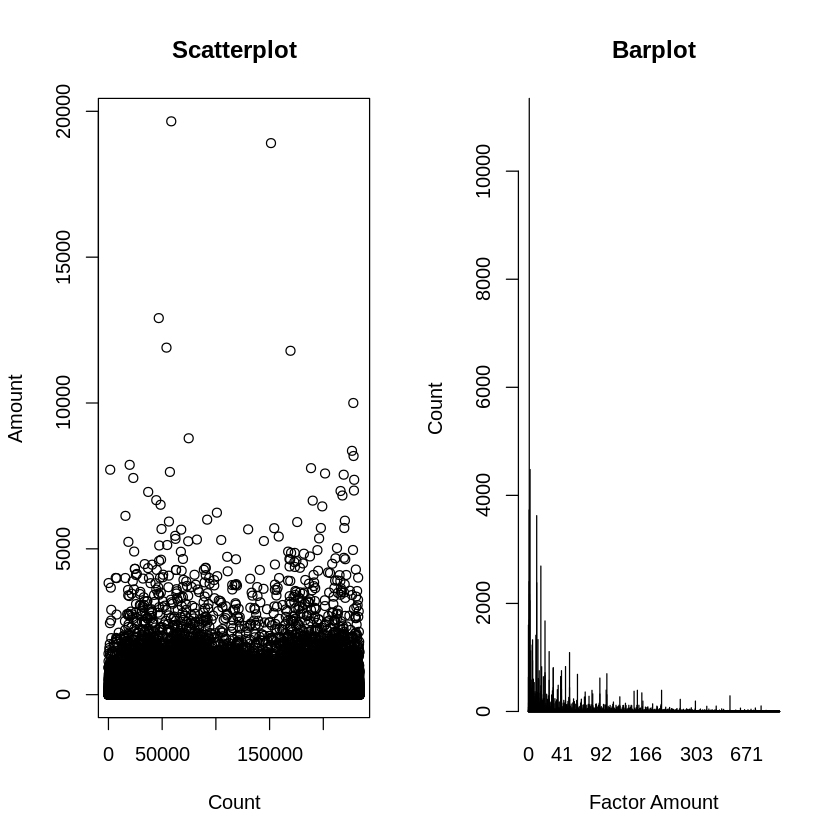

In [13]:
# View the plots
par(mfrow = c(1, 2))
x = 1:nrow(file_data)
y = file_data$Amount
my_factor <- factor(file_data$Amount)
# Scatterplot
plot(x, y, main = "Scatterplot",  xlab="Count", ylab="Amount")
# Barplot
plot(my_factor, main = "Barplot", xlab="Factor Amount", ylab="Count")

In [14]:
# Scale the data
file_data$Amount=scale(file_data$Amount)
data=file_data[,-c(1)]

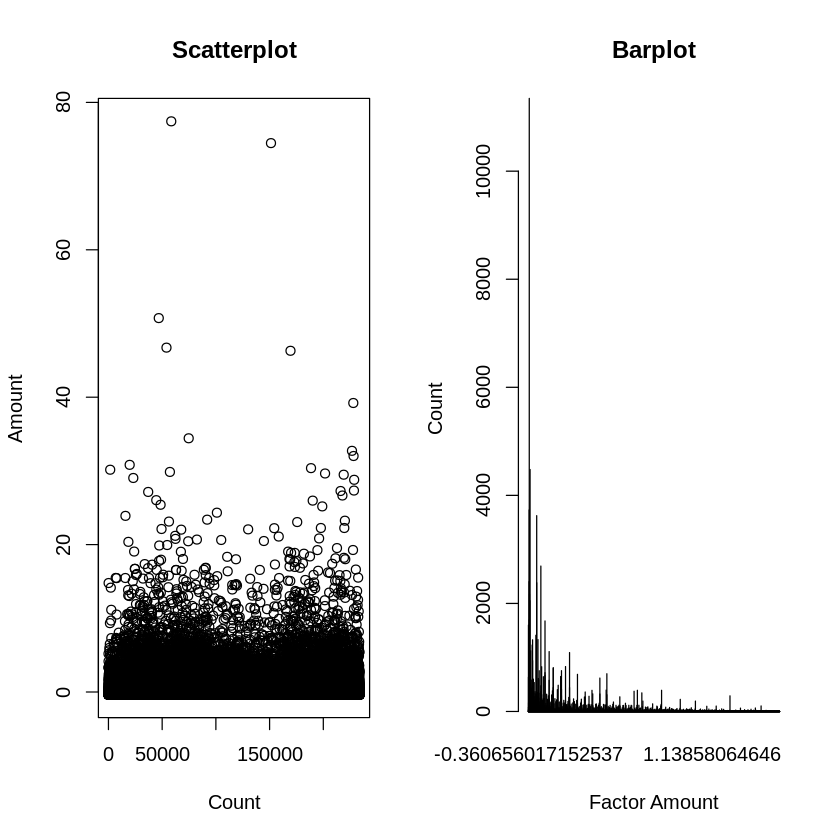

In [15]:
# View plots to verify the scalling
par(mfrow = c(1, 2))
y = data$Amount
my_factor <- factor(data$Amount)
# Scatterplot
plot(x, y, main = "Scatterplot",  xlab="Count", ylab="Amount")
# Barplot
plot(my_factor, main = "Barplot", xlab="Factor Amount", ylab="Count")

In [16]:
# Split the Data
set.seed(123)
data_sample = sample.split(data$Class,SplitRatio=0.80)
data.train_data = subset(data,data_sample==TRUE)
data.test_data = subset(data,data_sample==FALSE)

In [17]:
# Verify the splits
nrow(data.train_data)
nrow(data.test_data)

[1] 186993

[1] 46750

## Logistic Regression

In [18]:
# Fit the model
Logistic_Model = glm(Class~., data.train_data, family=binomial())

In [19]:
# Summary of model
summary(Logistic_Model)


Call:
glm(formula = Class ~ ., family = binomial(), data = data.train_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.52055    0.17822 -47.810  < 2e-16 ***
V1           0.03439    0.05123   0.671 0.502097    
V2           0.08934    0.07649   1.168 0.242837    
V3           0.04878    0.05594   0.872 0.383205    
V4           0.70884    0.09713   7.298 2.92e-13 ***
V5           0.12257    0.08248   1.486 0.137259    
V6          -0.06683    0.08749  -0.764 0.444936    
V7          -0.06533    0.08630  -0.757 0.449039    
V8          -0.14150    0.03648  -3.879 0.000105 ***
V9          -0.23462    0.13666  -1.717 0.086021 .  
V10         -0.76470    0.11685  -6.544 5.98e-11 ***
V11         -0.04114    0.08866  -0.464 0.642679    
V12          0.06509    0.10540   0.618 0.536887    
V13         -0.15994    0.09532  -1.678 0.093346 .  
V14         -0.46290    0.07334  -6.312 2.76e-10 ***
V15         -0.06033    0.10094  -0.598 0.550071    
V16    

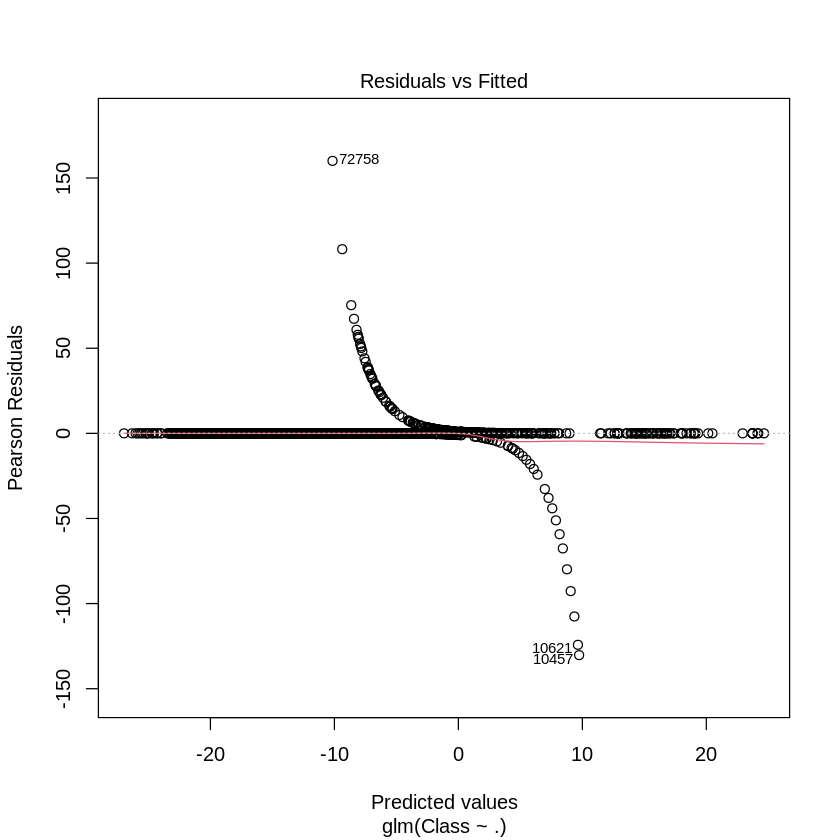

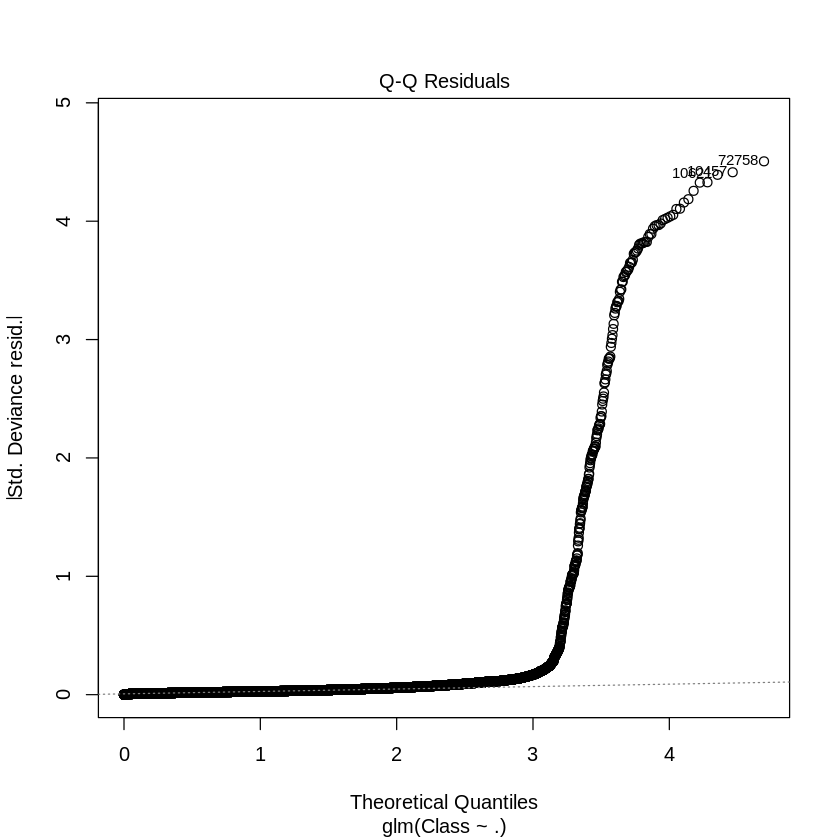

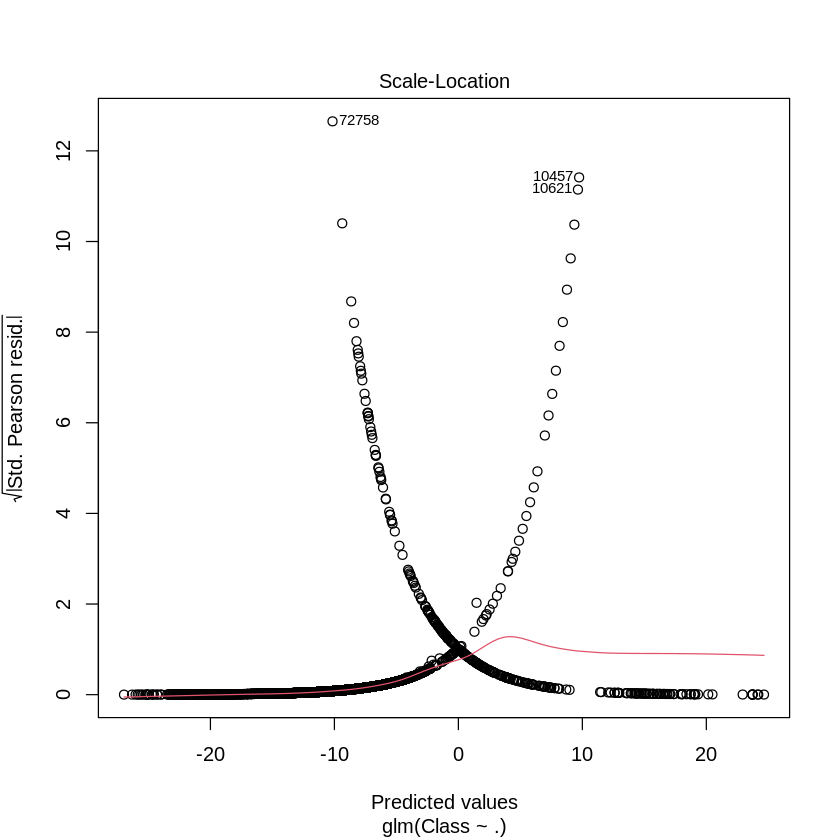

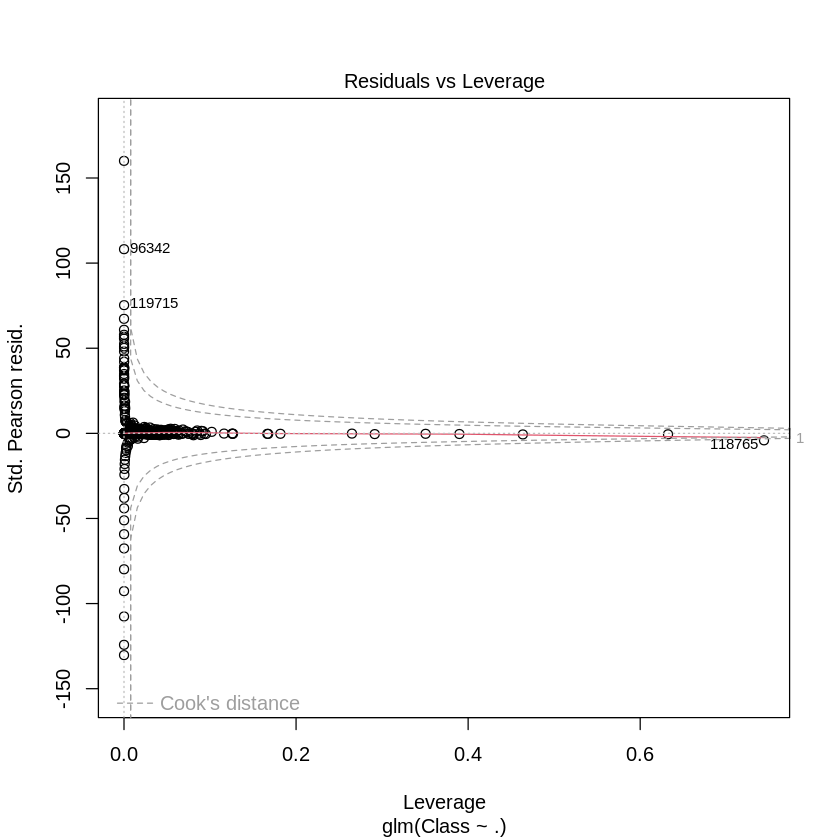

In [20]:
# Plot the logistic regression
plot(Logistic_Model)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



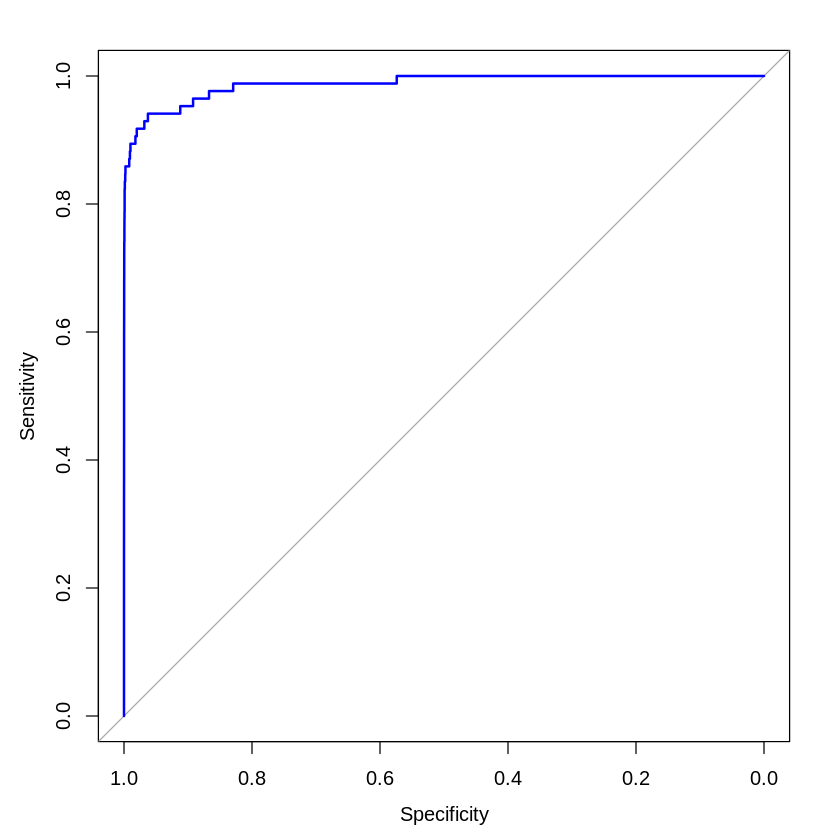

In [21]:
# Plot the curve
predicted_values <- predict(Logistic_Model, data.test_data, probability =True)
auc_gbm = roc(data.test_data$Class, predicted_values, plot = TRUE, col = "blue")

## Decision Tree

In [23]:
decisionTree_model <- rpart(Class~ . , data.train_data, method = 'class')

In [24]:
# Get probability and predictions
predicted_val <- predict(decisionTree_model, data.test_data, type = 'class')
probability <- predict(decisionTree_model, data.test_data, type = 'prob')

In [25]:
# Create truth table
cf_matrix <- table(data.test_data$Class,predicted_val)
print(cf_matrix)

   predicted_val
        0     1
  0 46650    14
  1    19    66


In [26]:
# Calulcate the accuracy
sum(diag(cf_matrix))/sum(cf_matrix) * 100

[1] 99.92941

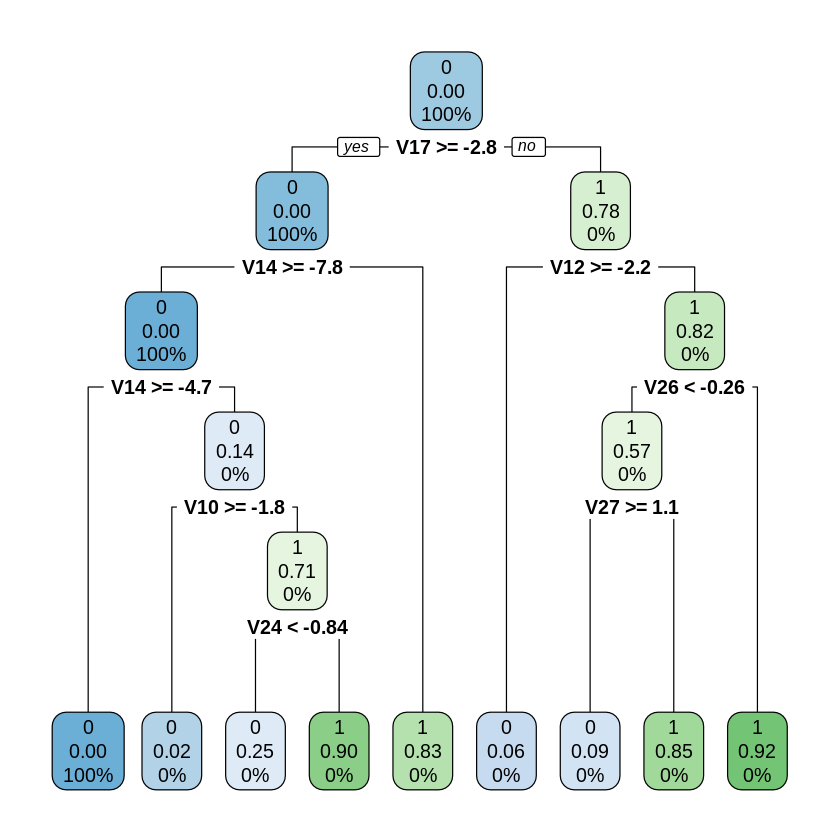

In [29]:
# Plot the decision Tree
library(rpart.plot)
rpart.plot(decisionTree_model)

## Neural Networks

In [30]:
# Minimize the dataset
set.seed(123)
data_sample = sample.split(data.test_data$Class,SplitRatio=0.80)
data.train_data_sm = subset(data.test_data,data_sample==TRUE)
data.test_data_sm = subset(data.test_data,data_sample==FALSE)

In [33]:
# Fit the neural network
library(neuralnet)
nn <- neuralnet(Class ~., data=data.train_data_sm, hidden=c(5,2), linear.output=FALSE, threshold=0.01)

In [34]:
# Get the results
nn.results <- compute(nn, data.train_data_sm)
results <- data.frame(actual = data.train_data_sm$Class, prediction = nn.results$net.result)

In [35]:
# Calculate Accuracy
roundedresults<-sapply(results,round,digits=0)
roundedresultsdf=data.frame(roundedresults)
attach(roundedresultsdf)
confusion_matrix = table(actual,prediction)
sum(diag(confusion_matrix))/sum(confusion_matrix) * 100

[1] 99.97326

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = data.test_data$Class, predictor = predicted_values,     plot = TRUE, col = "blue")

Data: predicted_values in 46664 controls (data.test_data$Class 0) < 85 cases (data.test_data$Class 1).
Area under the curve: 0.9873

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = data.test_data$Class, predictor = probability[,     2], plot = TRUE, col = "green")

Data: probability[, 2] in 46664 controls (data.test_data$Class 0) < 85 cases (data.test_data$Class 1).
Area under the curve: 0.9056

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = actual, predictor = prediction, plot = TRUE,     col = "red")

Data: prediction in 37331 controls (actual 0) < 68 cases (actual 1).
Area under the curve: 0.9558

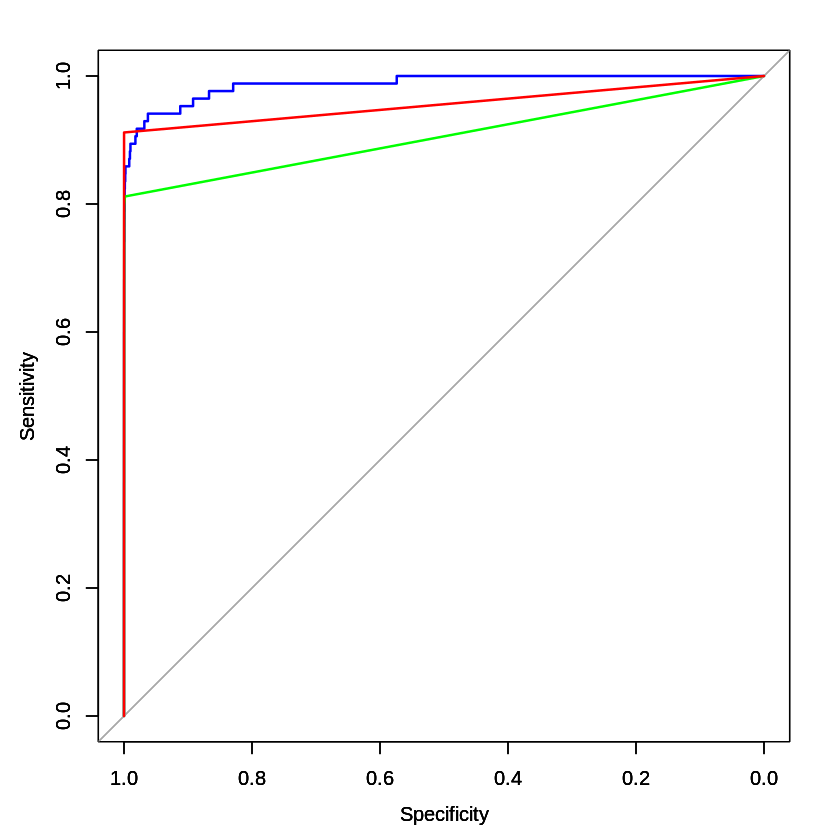

In [36]:
# Plot the comparative ROC curves
roc(data.test_data$Class, predicted_values, plot = TRUE, col = "blue")
par(new = TRUE)
roc(data.test_data$Class, probability[,2], plot = TRUE, col = "green")
par(new = TRUE)
roc(actual, prediction, plot = TRUE, col = "red")